The path to the notebook is: /home/ucecabj/Desktop/MFI_git/MFI_class1D
The data folder is: /home/ucecabj/Desktop/MFI_git/MFI_class1D/_data_SRTR/
The MFI grid was: 
xmin= -6.0  xmax= 6.0  nx= 501

The new PLUMED grid is: 
pl_xmin= -7.01  pl_xmax= 7.01  pl_nx= 585


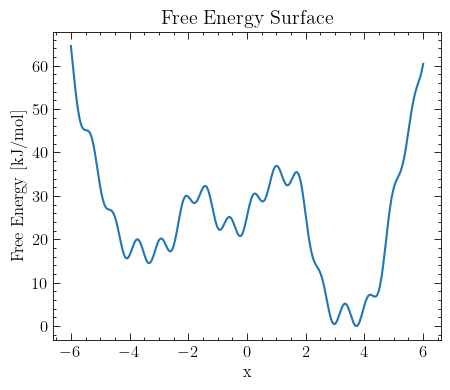

In [2]:
# Import the necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import os

# Import the MFI library 
import MFI_lib1D as lib1
import MFI_class1D

# Set the path to the notebook and the data folder (and figures folder if needed)
if 'path_notebook' not in globals(): path_notebook = os.getcwd()
print("The path to the notebook is:", path_notebook)

if 'path_data' not in globals():
    if not os.path.isdir("_data_SRTR"): print("\nThe data folder \"_data_SRTR\" does not exist. Creating new folder."); os.mkdir(path_notebook + "/_data_SRTR/"); 
    path_data = path_notebook + "/_data_SRTR/"
print("The data folder is:", path_data)
# path_figures = "/home/ucecabj/Pictures/MFI_figures/"

# Set the plotting parameters
for _plt_parameters_ in [0]:
    from matplotlib import rc
    plt.rcParams.update({ "text.usetex": True, "font.family": "serif", "font.serif": ["Helvetica"], "font.size": 12, "axes.titleweight": "bold"})
    plw = 0.6  # width of (box line, tick line, ...)
    plt.rcParams.update({"axes.linewidth": plw, "figure.figsize": (4,3)}) 
    plt.rcParams.update({"xtick.top": True, "xtick.direction": "in", "xtick.major.width": plw, "xtick.minor.width": plw, "xtick.minor.visible": True, "xtick.major.size": 5})
    plt.rcParams.update({"ytick.right": True, "ytick.direction": "in", "ytick.major.width": plw, "ytick.minor.width": plw, "ytick.minor.visible": True, "ytick.major.size": 5})


# Load the grid, the FES, and the PLUMED grid. Change n_surf to select the surface.  
for _surf_parameters_ in [0]:
    [grid, y_list, y_string_list] = lib1.load_pkl(path_notebook + "/fes_list_1D")
    FES_cutoff_list = [30, 40, 50, 50, 50, 70, 60, 60, 70, 80, 80, 90, 80, 90, 80, 100, 100, 100, 110, 110]
    n_surf = 3
    y = y_list[n_surf]
    FES_cutoff = FES_cutoff_list[n_surf]
    y_string = y_string_list[n_surf]
    plumed_dat_text = f"p: DISTANCE ATOMS=1,2 COMPONENTS\nff: MATHEVAL ARG=p.x FUNC=({y_string}) PERIODIC=NO\nbb: BIASVALUE ARG=ff\n"
    dx, dy = grid[1] - grid[0], np.gradient(y, grid[1] - grid[0]) 
    [pl_x, pl_min, pl_max, pl_n, pl_ext] = lib1.get_plumed_grid_1D(grid, -7, 7, print_info=True)
    plt.figure(figsize=(5,4)); plt.plot(grid, y); plt.xlabel("x"); plt.ylabel("Free Energy [kJ/mol]"); plt.title("Free Energy Surface"); plt.show()

### Define default parameters

In [3]:
default_params = {	"grid":grid, "y":y, "bw":dx*1.5, "periodic":False, "dy":dy, # "initial_position":[0,0], 
					"System":"Langevin", "plumed_dat_text":plumed_dat_text, "pl_grid":pl_x, "position_pace":20, "metad_pace":200, "n_pos_per_window":10, 
         			"Bias_sf":1.05, "gaus_filter_sigma":1, 
					"FES_cutoff":FES_cutoff, 
                    "calculate_FES_st_dev":False, "bootstrap_iter":50,
                    "save_mfi_instance":True, "simulation_folder_path": path_data}

### Run test SRTR (Single Real-Time ReInitialisation) simulation

~~ S1  START ~~~
~~ S1  PHASE: exploration ~~~  | MetaD h= 3.33 , w= 0.3 , bf= 250 | 
S 1 | t= 0.25ns | t_tot= 0.25ns | n_pos: 2500/ 2500 : Aofe: 7.12 | AAD: 1.70 | 
S 1 END | t= 1.20ns | t_tot= 1.20ns | n_pos: 12000/12000 : Aofe: 2.900 | AAD: 0.676 | ABS: 0.892 | Reason for termination: Exploration stage completed
~~ S2  START ~~~
~~ S2  PHASE: metad ~~~  | MetaD h= 0.67 , w= 0.1174 , bf= 6 | InvF Bias sf= 1.05, guas sigma = 1 | 
S 2 | t= 0.20ns | t_tot= 1.40ns | n_pos: 2010/14010 : Aofe: 2.643 | AAD: 0.779 | ABS: 0.725 
S 2 | t= 0.30ns | t_tot= 1.50ns | n_pos:  990/15000 : Aofe: 2.537 | AAD: 0.844 | ABS: 0.719 
S 2 | t= 0.35ns | t_tot= 1.55ns | n_pos:  510/15510 : Aofe: 2.484 | AAD: 0.863 | ABS: 0.846 
S 2 | t= 0.40ns | t_tot= 1.60ns | n_pos:  500/16010 : Aofe: 2.442 | AAD: 0.877 | ABS: 0.674 
S 2 | t= 0.49ns | t_tot= 1.69ns | n_pos:  850/16860 : Aofe: 2.376 | AAD: 0.802 | ABS: 0.687 
S 2 | t= 0.55ns | t_tot= 1.75ns | n_pos:  640/17500 : Aofe: 2.325 | AAD: 0.702 | ABS: 0.664 
S 2 | t

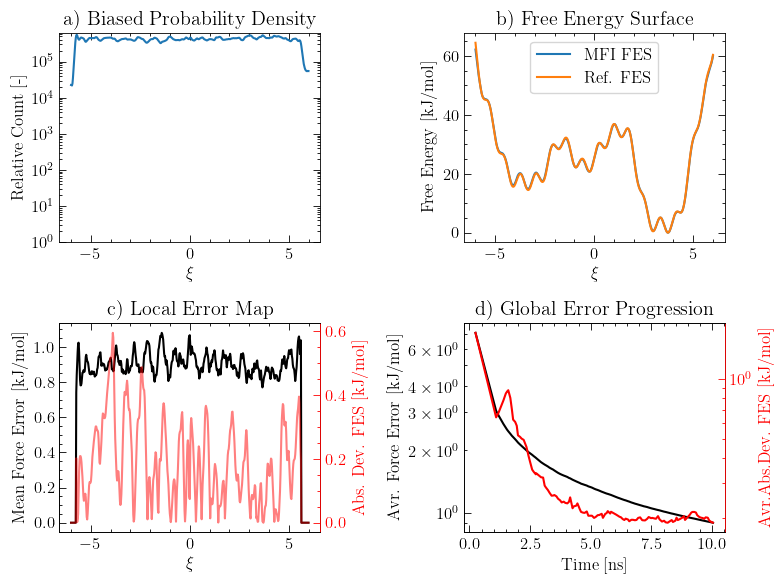


~~~~~~ END ~~~~~~

MFI.Aofe = 0.9031, MFI.AAD = 0.1894


In [4]:
# Prepare the MFI object
MFI = MFI_class1D.MFI1D(**default_params)

# Run simulation with real time analysis and re-initialisation
MFI.MFI_real_time_ReInit(ID="_test", goal=0.01, main_error_type="AAD", n_pos_before_analysis=500, guaranteed_sim_time=3, max_sim_time=5, ### time units [ns] , with metad_pace=500 -> 1ns ~ 400 hills
                         time_budget=10)  # use this for starting a SRTR-campaign for 0 ns.  
                        #  restart_SRTR="full_reload_ignore_1", time_budget=10)  # use this for re-starting a SRTR-campaign from existing data.

# Plot+print the final results
MFI.plot_results()
print(f"\n~~~~~~ END ~~~~~~\n\n{MFI.Aofe = :.4f}, {MFI.AAD = :.4f}")

lib1.save_pkl(np.array(MFI.Avr_Error_list).T, MFI.campaign_path + "error_progression_testALT.pkl")


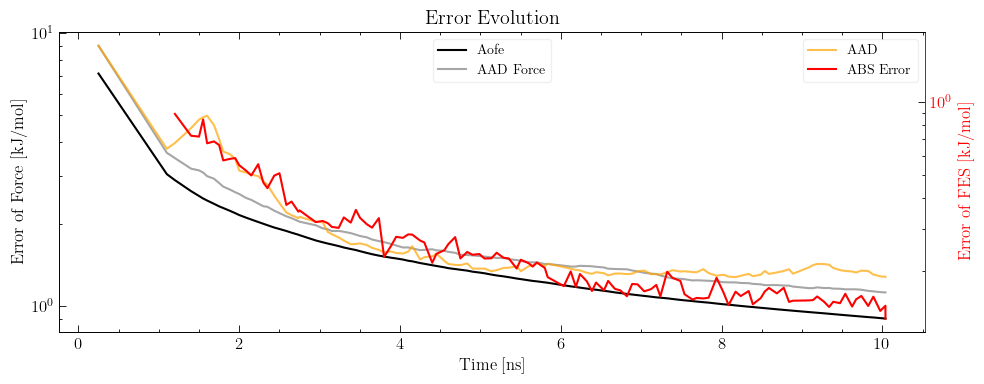

In [5]:
MFI.plot_errors(error_type=["Aofe", "AAD_Force", "AAD", "ABS_error"])

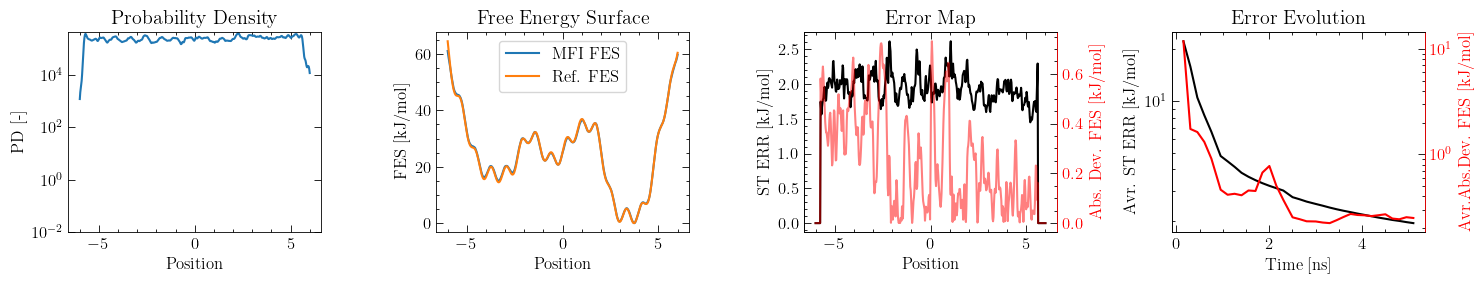

MFI_reload.Aofe = 1.9465, MFI_reload.AAD = 0.2499


In [3]:
### if save_mfi_instance = True, we can reload the instance and plot the results or access the force terms, ...

# specify the path to the instance
mfi_instance_path = path_data + "SRTRcampaign_test/MFI_instance_test.pkl"

MFI_reload = MFI_class1D.load_instance(mfi_instance_path)

MFI_reload.plot_results()
print(f"{MFI_reload.Aofe = :.4f}, {MFI_reload.AAD = :.4f}")

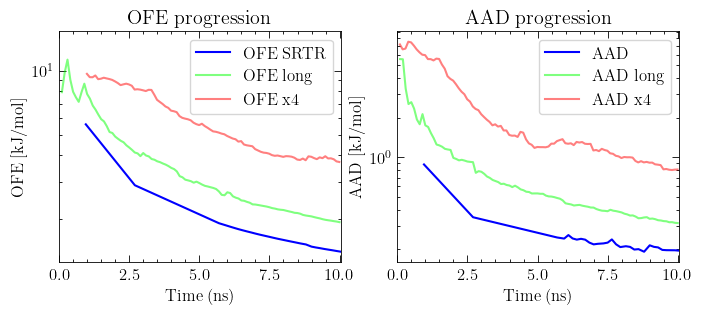

In [11]:
### plot convergence and compare with long and x4 simulations
plot_twin_axis = False

[time_l, ofe_mean_l, ofe_ste_l, aad_mean_l, aad_ste_l] = lib1.load_pkl(path_notebook + "/error_progressions/error_progression_long_10ns")
[time_p, ofe_mean_p, ofe_ste_p, aad_mean_p, aad_ste_p] = lib1.load_pkl(path_notebook + "/error_progressions/error_progression_x4_10ns"  )

t = np.array(MFI.Avr_Error_list)[:, 0]
ofe = np.array(MFI.Avr_Error_list)[:, 2]
aad = np.array(MFI.Avr_Error_list)[:, MFI.aad_index]

if not plot_twin_axis:
    plt.figure(figsize=(8,3)); plt.subplot(1,2,1); 
    plt.plot(t, ofe, label="OFE SRTR", color="blue")
    plt.plot(time_l, ofe_mean_l, label="OFE long", color="lime", alpha=0.5)
    plt.plot(time_p, ofe_mean_p, label="OFE x4", color="red", alpha=0.5)
    # for i in range(1, len(MFI.tot_time)): plt.axvline(x=sum(MFI.tot_time[1:i+1]), color="blue", linestyle="--", alpha=0.5, linewidth=1)
    plt.yscale("log"); 
    plt.xlim(0, max(t)); plt.legend(); plt.title("OFE progression"); plt.xlabel("Time (ns)"); plt.ylabel("OFE [kJ/mol]")

    plt.subplot(1,2,2)
    plt.plot(t, aad, label="AAD", color="blue")
    plt.plot(time_l, aad_mean_l, label="AAD long", color="lime", alpha=0.5)
    plt.plot(time_p, aad_mean_p, label="AAD x4", color="red", alpha=0.5)
    # for i in range(1, len(MFI.tot_time)): plt.axvline(x=sum(MFI.tot_time[1:i+1]), color="blue", linestyle="--", alpha=0.5, linewidth=1)
    plt.yscale("log"); 
    plt.xlim(0, max(t)); plt.legend(); plt.title("AAD progression"); plt.xlabel("Time (ns)"); plt.ylabel("AAD [kJ/mol]") 
    plt.show()

else:
    option = False
    plt.figure(figsize=(8,8))
    plt.plot(np.insert(t, 0, 0), np.insert(ofe, 0, 15), label="OFE SRTR", color="blue", linewidth=5, alpha=0.5, linestyle="--")
    plt.plot(np.insert(time_l, 0, 0), np.insert(ofe_mean_l, 0, 15), label="OFE long", color="lime", linewidth=5, alpha=0.4)
    plt.plot(np.insert(time_p, 0, 0), np.insert(ofe_mean_p, 0, 15), label="OFE x4", color="red", linewidth=5, alpha=0.2)
    # for i in range(1, len(MFI.tot_time)): plt.axvline(x=sum(MFI.tot_time[1:i+1]), color="blue", linestyle="--", alpha=0.5, linewidth=1)
    plt.yscale("log") if option is False else plt.ylim(0, 0.4692*30)
    plt.legend(); plt.title("Error progression"); plt.xlabel("Time (ns)"); plt.ylabel("OFE [kJ/mol]")
    plt.gca().twinx()
    plt.plot(np.insert(t, 0, 0), np.insert(aad, 0, 10), label="AAD", color="blue")
    plt.plot(np.insert(time_l, 0, 0), np.insert(aad_mean_l, 0, 10), label="AAD long", color="lime", alpha=0.5)
    plt.plot(np.insert(time_p, 0, 0), np.insert(aad_mean_p, 0, 10), label="AAD x4", color="red", alpha=0.5)
    plt.yscale("log") if option is False else plt.ylim(0, 0.0411*30) 
    plt.ylabel("AAD [kJ/mol]") 
    plt.show()

# MFI.plot_results()


### Run Multiple Long Simulations and analysis (for statistical analysis)

In [11]:
os.chdir(path_notebook); reload(MFI_class1D); reload(lib1); pass

In [3]:
default_params = {	"grid":grid, "y":y, "bw":dx*1.5, "periodic":False, # "dy":dy, "initial_position":[0,0], 
					"System":"Langevin", "pl_grid":pl_x, "position_pace":20, "metad_pace":200, "n_pos_per_window":10, 
         			"Bias_sf":1.05, "gaus_filter_sigma":1, 
					"FES_cutoff":FES_cutoff, "calculate_FES_st_dev":False, "bootstrap_iter":20,
     				"simulation_folder_path": path_data, "print_info": False}

In [11]:
n_campaigns = 28
min_sim_time, max_sim_time, time_budget = 3, 5, 5

# loop over campaigns
for i in range(1,n_campaigns+1):
    
    print(f"\n###~~~~~~ Simulation {i} ~~~~~~###\n")
        
    # Loop over all surfaces
    # for n_surf in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]:
    # for n_surf in range(20):
    for n_surf in range(20):

        # Set the surface
        y, y_string, FES_cutoff = y_list[n_surf], y_string_list[n_surf], FES_cutoff_list[n_surf]
        plumed_dat_text = f"p: DISTANCE ATOMS=1,2 COMPONENTS\nff: MATHEVAL ARG=p.x FUNC=({y_string}) PERIODIC=NO\nbb: BIASVALUE ARG=ff\n"
        # print(f"~~~~~~ Simulation {i}: surface {n_surf} ~~~~~~")
        # Set the path to the campaign folder and the campaign ID
        new_path = path_data + f"S{n_surf}/"
        if not os.path.isdir(new_path): os.mkdir(new_path)
        camp_ID = f"_{i}_{time_budget}ns"
        path_campaign = new_path + f"SRTRcampaign{camp_ID}/"
        
        #check if directory exists. If does not exist, create it and move to it.
        if not os.path.isdir(path_campaign): os.mkdir(path_campaign)
        os.chdir(path_campaign)
        
        # check if error progression file exists. If it does, skip this iteration, otherwise run the campaign.
        if os.path.isfile(path_campaign + f"error_progression_SRTR_{i}_5ns"): 
            error = lib1.load_pkl(path_campaign + f"error_progression_SRTR_{i}_5ns")
            if error[2][-1] > 2.5: print(f"S{n_surf}: AAD = {error[2][-1]:.4f}")
            # print(f"Results exists. Aofe={error[1][-1]:.4f}, AAD={error[2][-1]:.4f}, ABS={error[3][-1]:.4f}") 
            continue	
        else: print(f"S{n_surf}: Running campaign {i} of {n_campaigns} ")    
      
        ## Prepare MFI object
        new_params = default_params.copy()
        new_params.update({"simulation_folder_path":new_path, "y":y, "plumed_dat_text":plumed_dat_text, "FES_cutoff":FES_cutoff})             
        MFI = MFI_class1D.MFI1D(**new_params)
        
        try:
            ## Run campaign
            MFI.MFI_real_time_ReInit(ID=camp_ID, goal=0.01, main_error_type="AAD", n_pos_before_analysis=500, reset_forces_after="Exploration",
                                    guaranteed_sim_time=min_sim_time, max_sim_time=max_sim_time, time_budget=time_budget)### time units [ns] , with metad_pace=500 -> 1ns ~ 400 hills

            ## Print final error and save error progression
            ## Print final error and save error progression
            print(f"~~~~ End of campaign ~~~~Aofe={MFI.Aofe:.4f}, AAD={MFI.AAD:.4f}, ABS={MFI.ABS_error:.4f}\n")
            lib1.save_pkl([list(MFI.Avr_Error_list[:, 0]), list(MFI.Avr_Error_list[:, 2]), list(MFI.Avr_Error_list[:, MFI.aad_index]), list(MFI.Avr_Error_list[:, MFI.abs_error_index])], path_campaign + f"error_progression_SRTR_{i}_5ns")
            
        except: 
            print(f"\n~~~~~~~~~~~~ Error in campaign (needs to be repeated) ~~~~~~~~~~~~\n\n\n")




###~~~~~~ Simulation 1 ~~~~~~###


###~~~~~~ Simulation 2 ~~~~~~###


###~~~~~~ Simulation 3 ~~~~~~###


###~~~~~~ Simulation 4 ~~~~~~###


###~~~~~~ Simulation 5 ~~~~~~###


###~~~~~~ Simulation 6 ~~~~~~###


###~~~~~~ Simulation 7 ~~~~~~###


###~~~~~~ Simulation 8 ~~~~~~###


###~~~~~~ Simulation 9 ~~~~~~###


###~~~~~~ Simulation 10 ~~~~~~###


###~~~~~~ Simulation 11 ~~~~~~###


###~~~~~~ Simulation 12 ~~~~~~###


###~~~~~~ Simulation 13 ~~~~~~###


###~~~~~~ Simulation 14 ~~~~~~###


###~~~~~~ Simulation 15 ~~~~~~###


###~~~~~~ Simulation 16 ~~~~~~###


###~~~~~~ Simulation 17 ~~~~~~###


###~~~~~~ Simulation 18 ~~~~~~###


###~~~~~~ Simulation 19 ~~~~~~###


###~~~~~~ Simulation 20 ~~~~~~###


###~~~~~~ Simulation 21 ~~~~~~###


###~~~~~~ Simulation 22 ~~~~~~###


###~~~~~~ Simulation 23 ~~~~~~###


###~~~~~~ Simulation 24 ~~~~~~###


###~~~~~~ Simulation 25 ~~~~~~###


###~~~~~~ Simulation 26 ~~~~~~###


###~~~~~~ Simulation 27 ~~~~~~###


###~~~~~~ Simulation 28 ~~~~~~###



## Alanine Dipeptide

In [7]:
grid = np.linspace(-np.pi, np.pi, 101); 
[pl_x, pl_min, pl_max, pl_n, pl_ext] = lib1.get_plumed_grid_1D(grid, periodic=True, print_info=True)

path_AP = path_data + "Alanine_Dipeptide/"
path_input = path_notebook + "/gmx_files/Alanine_Dipeptide/"
plumed_dat_text = f"MOLINFO STRUCTURE={path_input}reference.pdb\nphi: TORSION ATOMS=@phi-2\n"

In [8]:
# default parameters for the MFI class
default_params = {	"grid":grid, "bw":0.1, #"Z":AP_ref, 
                    "pl_grid":pl_x, "periodic":True, "System":"gromacs", "cv_name":"phi", "plumed_dat_text":plumed_dat_text,
                    "kT":2.49, "time_step":0.001, "position_pace":10, "metad_pace":100, "n_pos_per_window":10,
         			"FES_cutoff":80.0, # "record_maps":True, "record_forces_e":True, "calculate_FES_st_dev":True, "bootstrap_iter":50, 
                    # "save_error_progression":True, "save_force_terms":True, "save_results":True, "save_mfi_instance":True, 
                    "simulation_folder_path": path_AP+"test/", "ID":"",
				  	
                    "find_sim_init_structure":True, "make_tpr_input_file":True, 
					"trajectory_xtc_file_path_list":[path_input+"traj_0.xtc"], "structure_gro_file_path":path_input+"structure.gro", "mdp_file_path":path_input+"gromppvac.mdp", "top_file_path":path_input+"topology.top", "tpr_file_path":path_input+"input.tpr", "pdb_file_path":path_input+"reference.pdb",
           			}
                  

~~ S1  START ~~~
~~ S1  PHASE: exploration ~~~  | MetaD h= 5.33 , w= 0.15708 , bf= 400 | 
S 1 | t= 0.03ns | t_tot= 0.03ns | n_pos: 3000/ 3000 : Aofe: 4.39 | 
S 1 END | t= 0.06ns | t_tot= 0.06ns | n_pos: 6000/ 6000 : Aofe: 3.293 | Reason for termination: Exploration stage completed
~~ S2  START ~~~
~~ S2  PHASE: metad ~~~  | MetaD h= 1.07 , w= 0.29977 , bf= 9 | InvF Bias sf= 1, guas sigma = None | 
S 2 | t= 0.03ns | t_tot= 0.09ns | n_pos: 3000/ 9000 : Aofe: 2.570 | 
S 2 | t= 0.06ns | t_tot= 0.12ns | n_pos: 3000/12000 : Aofe: 2.180 | 
S 2 | t= 0.09ns | t_tot= 0.15ns | n_pos: 3000/15000 : Aofe: 1.932 | 
S 2 END | t= 0.12ns | t_tot= 0.18ns | n_pos: 12000/18000 : Aofe: 1.737 | Reason for termination: Metad phase completed (max_vol_diff=0.00%)
~~ S3  START ~~~
~~ S3  PHASE: flat ~~~ Bias Type: "  " ~~~  | MetaD h= 0.27 , w= 0.1859 , bf= 3 | InvF Bias sf= 1, guas sigma = None | 
S 3 | t= 0.03ns | t_tot= 0.21ns | n_pos: 3000/21000 : Aofe: 1.590 | 
S 3 | t= 0.06ns | t_tot= 0.24ns | n_pos: 3000/

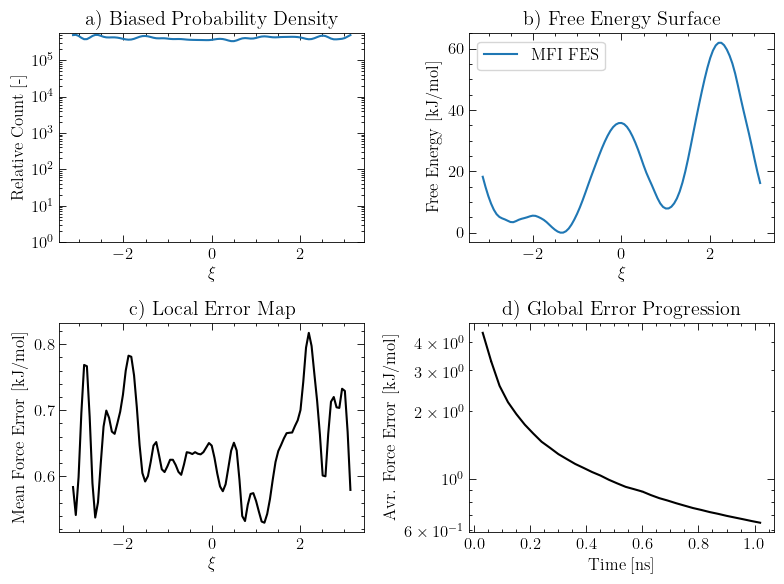


~~~~~~ END ~~~~~~

MFI.Aofe = 0.6459


In [9]:
# Prepare the MFI object
MFI = MFI_class1D.MFI1D(**default_params)

# Run simulation with real time analysis and re-initialisation
MFI.MFI_real_time_ReInit(ID="_test", goal=0.01, main_error_type="ST_ERR", n_pos_before_analysis=3000, guaranteed_sim_time=0.2, max_sim_time=0.4, ### time units [ns] , with metad_pace=500 -> 1ns ~ 400 hills
                         time_budget=1)  # use this for starting a SRTR-campaign for 0 ns.  
                        #  restart_SRTR=True, time_budget=25)  # use this for re-starting a SRTR-campaign from existing data.

# Plot+print the final results
MFI.plot_results()
print(f"\n~~~~~~ END ~~~~~~\n\n{MFI.Aofe = :.4f}")

## Calculate and plot average error progression

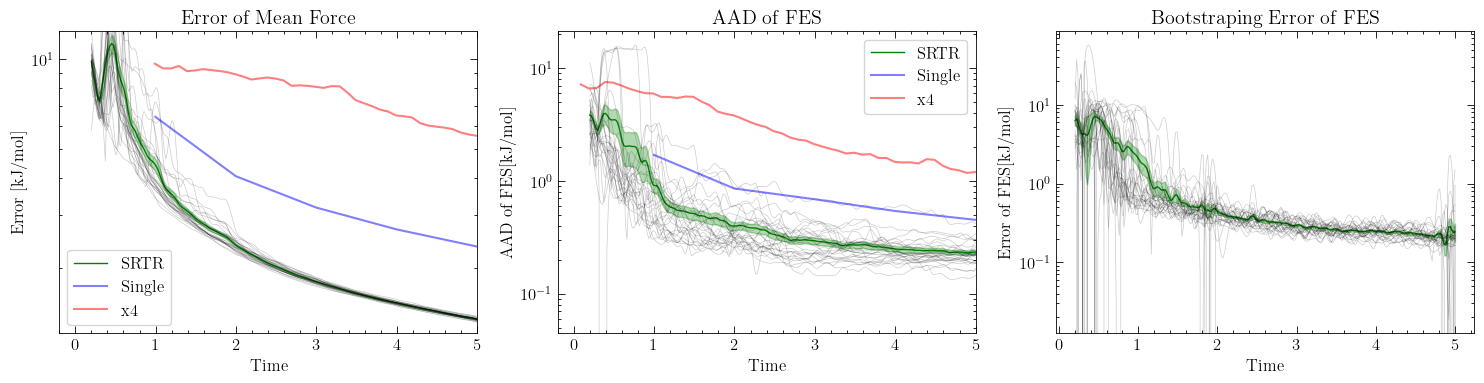

In [13]:
# n_surf = 15
# total_campaigns = 20
# time_budget = 10

n_surf = 3
total_campaigns = 28
time_budget = 5

# calculate and plot the average error progression
lib1.get_avr_error_prog(path_data, n_surf=n_surf, total_campaigns=total_campaigns, time_budget=time_budget, simulation_type="SRTR", show_plot=False, line_label="SRTR")

# plot the average error progression of the long and 4-patallel simulations
[time_l, ofe_mean_l, ofe_ste_l, aad_mean_l, aad_ste_l] = lib1.load_pkl(path_notebook + "/error_progressions/error_progression_long")
[time_p, ofe_mean_p, ofe_ste_p, aad_mean_p, aad_ste_p] = lib1.load_pkl(path_notebook + "/error_progressions/error_progression_x4_10ns"  )
plt.subplot(1,3,1); plt.plot(time_l, ofe_mean_l, label="Single", color="blue", alpha=0.5); plt.plot(time_p, ofe_mean_p, label="x4", color="red", alpha=0.5); plt.legend(); plt.xlim(-0.2, 5); 
plt.subplot(1,3,2); plt.plot(time_l, aad_mean_l, label="Single", color="blue", alpha=0.5); plt.plot(time_p, aad_mean_p, label="x4", color="red", alpha=0.5); plt.legend(); plt.xlim(-0.2, 5); 

plt.tight_layout(); plt.show()
